In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dataset/feature_vectors.csv')
data.head()

,review_id,user_stars,user_review_count,user_useful,business_stars,business_review_count,unigram,class
0,v0i_UHJMo_hPBq9bxWvW4w,4.67,6,0,4.0,1953,2.497094,5.0
1,vkVSCC7xljjrAI4UGfnKEQ,4.67,6,0,4.0,84,3.333678,5.0
2,n6QzIUObkYshz4dz2QRJTw,4.67,6,0,4.5,50,2.988476,5.0
3,MV3CcKScW05u5LVfF6ok0g,4.67,6,0,4.0,70,3.007784,5.0
4,IXvOzsEMYtiJI0CARmj77Q,4.67,6,0,3.5,61,2.890452,4.0


** Show the distribution of reviews **

<Container object of 5 artists>

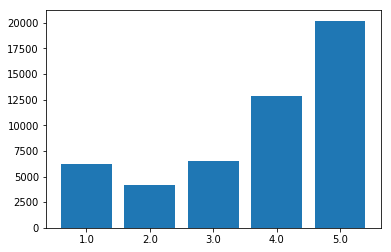

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

c1 = data[data['class'] == 1].shape[0]
c2 = data[data['class'] == 2].shape[0]
c3 = data[data['class'] == 3].shape[0]
c4 = data[data['class'] == 4].shape[0]
c5 = data[data['class'] == 5].shape[0]

x = ["1.0", "2.0", "3.0", "4.0", "5.0"]
y = [c1,c2,c3,c4,c5]

plt.bar(x,y)
#data['class'].plot(kind='kde',style='k--')

** Split our data into training and testing sets **

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

X = data[['user_stars','user_review_count','user_useful','business_stars','business_review_count','unigram']]
y = data[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

** Run a linear regression model on the data **

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create linear regression object
regr = linear_model.LinearRegression() 

# Fit regression model to the training set
regr.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = regr.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_pred) ))
print('R-squared = %.4f' % r2_score( y_test, y_pred ))

Root mean squared error = 0.9973
R-squared = 0.4808
Root mean squared error = 1.0006
R-squared = 0.4819


** Run a ridge regression model on the data **

In [6]:
# Create lasso regression object
ridge = linear_model.RidgeCV(cv=5, alphas=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,1.0])

# Fit regression model to the training set
ridge.fit( X_train, y_train.values.ravel() )

y_train_pred = ridge.predict(X_train)

# Apply model to the test set
y_pred = ridge.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_pred ))
print('Selected alpha = %.2f' % ridge.alpha_)

Root mean squared error = 0.9973
R-squared = 0.4808
Root mean squared error = 1.0006
R-squared = 0.4819
Selected alpha = 1.00


** Run a lasso regression model on the data **

In [7]:
# Create lasso regression object
lasso = linear_model.LassoCV(cv=5, alphas=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,1.0])

# Fit regression model to the training set
lasso.fit( X_train, y_train.values.ravel() )

y_train_pred = lasso.predict(X_train)

# Apply model to the test set
y_pred = lasso.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_pred ))
print('Selected alpha = %.2f' % lasso.alpha_)

Root mean squared error = 0.9975
R-squared = 0.4807
Root mean squared error = 1.0007
R-squared = 0.4817
Selected alpha = 0.01


** Test the RMSE and R2_score just using the unigram prediction **

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

y_unigram_pred = X_test[['unigram']]
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_unigram_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_unigram_pred ))

Root mean squared error = 1.7003
R-squared = -0.4961


** Test the RMSE and R2_score of a base case where every review is classified as 5 (the most common class) **

In [9]:
y_test_base = [5 for i in range(len(y_test))]
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_test_base) ))
print('R-squared = %.4f' % r2_score( y_test, y_test_base ))

Root mean squared error = 1.8852
R-squared = -0.8393


** Test the RMSE and R2_score of a base case where every review is classified as the average review score **

In [11]:
x = 5*(len(data[data['class']==5])/50000)+4*(len(data[data['class']==4])/50000)+3*(len(data[data['class']==3])/50000)+2*(len(data[data['class']==2])/50000)+1*(len(data[data['class']==1])/50000)
y_test_base = [x for i in range(len(y_test))]
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_test_base) ))
print('R-squared = %.4f' % r2_score( y_test, y_test_base ))

Root mean squared error = 1.3901
R-squared = -0.0000


** Run a logistic regression classifier on the feature vector **

In [12]:
from sklearn.metrics import accuracy_score

y_train = y_train.astype('int')
y_test = y_test.astype('int')
logistic = linear_model.LogisticRegressionCV(cv= 5 , Cs = [0.01, 0.05, 0.1, 0.5, 1] )
logistic.fit( X_train, y_train.values.ravel() )
class_pred = logistic.predict( X_test )

print('Accuracy = %.4f' % accuracy_score( y_test, class_pred ))

Accuracy = 0.5258


** Determine base classification accuracy by classifying as 5 every time **

In [13]:
print("Base accuracy = %.4f" % (len(data[data['class']==5])/50000))

Base accuracy = 0.4037


** Determine base classification accuracy by assigning a random class based on the probability distribution of our data **

In [14]:
from random import randint

y_base_class = []
pred5 = 100 - (len(data[data['class']==5])/50000)*100
pred4 = pred5 - (len(data[data['class']==4])/50000)*100
pred3 = pred4 - (len(data[data['class']==3])/50000)*100
pred2 = pred3 - (len(data[data['class']==2])/50000)*100
pred1 = pred2 - (len(data[data['class']==1])/50000)*100

for i in range(len(y_test)):
    x=randint(0, 100)
    if x > pred5:
        y_base_class.append(5)
    elif x > pred4:
        y_base_class.append(4)
    elif x > pred3:
        y_base_class.append(3)
    elif x > pred2:
        y_base_class.append(2)
    else:
        y_base_class.append(1)
        
print('Accuracy = %.4f' % accuracy_score( y_test, y_base_class ))

Accuracy = 0.2666


** Re-train the model by classifying reviews as "good" (1) or "bad" (0) instead of making a unigram prediction **

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
import copy

X_train_copy = copy.deepcopy(X_train)
X_test_copy = copy.deepcopy(X_test)

X_train['unigram'] = [1 if point >= 2.5 else 0 for point in X_train_copy['unigram']]
X_test['unigram'] = [1 if point >= 2.5 else 0 for point in X_test_copy['unigram']]

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create linear regression object
regr = linear_model.LinearRegression() 

# Fit regression model to the training set
regr.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = regr.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_pred) ))
print('R-squared = %.4f' % r2_score( y_test, y_pred ))

Root mean squared error = 0.9956
R-squared = 0.4826
Root mean squared error = 0.9955
R-squared = 0.4871


In [17]:
# Create lasso regression object
ridge = linear_model.RidgeCV(cv=5, alphas=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,1.0])

# Fit regression model to the training set
ridge.fit( X_train, y_train.values.ravel() )

y_train_pred = ridge.predict(X_train)

# Apply model to the test set
y_pred = ridge.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_pred ))
print('Selected alpha = %.2f' % ridge.alpha_)

Root mean squared error = 0.9956
R-squared = 0.4826
Root mean squared error = 0.9955
R-squared = 0.4871
Selected alpha = 1.00


In [18]:
# Create lasso regression object
lasso = linear_model.LassoCV(cv=5, alphas=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,1.0])

# Fit regression model to the training set
lasso.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = lasso.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_pred ))
print('Selected alpha = %.2f' % lasso.alpha_)

Root mean squared error = 0.9956
R-squared = 0.4826
Root mean squared error = 0.9960
R-squared = 0.4867
Selected alpha = 0.01


In [19]:
from sklearn.metrics import accuracy_score

logistic = linear_model.LogisticRegressionCV(cv= 5 , Cs = [0.01, 0.05, 0.1, 0.5, 1] )
logistic.fit( X_train, y_train.values.ravel() )
class_pred = logistic.predict( X_test )

print('Accuracy = %.4f' % accuracy_score( y_test, class_pred ))

Accuracy = 0.5313


**Re-train the model by classifying reviews as "good" (2), "medium" (1) or "bad" (0) instead of making a unigram prediction**

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import copy

X_train['unigram'] = [2 if point > 3.1 else 1 if point > 2.1 else 0 for point in X_train_copy['unigram']]
X_test['unigram'] = [2 if point > 3.1 else 1 if point > 2.1 else 0 for point in X_test_copy['unigram']]

X_train.head()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_stars,user_review_count,user_useful,business_stars,business_review_count,unigram
12741,2.39,490,175,3.0,340,0
18005,3.59,77,116,4.5,686,1
36729,3.88,58,2,4.5,1041,1
48571,3.74,18,23,5.0,22,0
25464,3.47,13,79,4.0,177,2


In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create linear regression object
regr = linear_model.LinearRegression() 

# Fit regression model to the training set
regr.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = regr.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_pred) ))
print('R-squared = %.4f' % r2_score( y_test, y_pred ))

Root mean squared error = 0.9713
R-squared = 0.5075
Root mean squared error = 0.9714
R-squared = 0.5116


In [22]:
# Create lasso regression object
ridge = linear_model.RidgeCV(cv=5, alphas=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,1.0])

# Fit regression model to the training set
ridge.fit( X_train, y_train.values.ravel() )

y_train_pred = ridge.predict(X_train)

# Apply model to the test set
y_pred = ridge.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_pred ))
print('Selected alpha = %.2f' % ridge.alpha_)

Root mean squared error = 0.9713
R-squared = 0.5075
Root mean squared error = 0.9714
R-squared = 0.5116
Selected alpha = 1.00


In [23]:
# Create lasso regression object
lasso = linear_model.LassoCV(cv=5, alphas=[0.01,0.02,0.05,0.1,0.2,0.3,0.5,1.0])

# Fit regression model to the training set
lasso.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = lasso.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test,y_pred) ))
print('R-squared = %.4f' % r2_score( y_test,y_pred ))
print('Selected alpha = %.2f' % lasso.alpha_)

Root mean squared error = 0.9713
R-squared = 0.5075
Root mean squared error = 0.9717
R-squared = 0.5114
Selected alpha = 0.01


In [24]:
from sklearn.metrics import accuracy_score

logistic = linear_model.LogisticRegressionCV(cv= 5 , Cs = [0.01, 0.05, 0.1, 0.5, 1] )
logistic.fit( X_train, y_train.values.ravel() )
class_pred = logistic.predict( X_test )

print('Accuracy = %.4f' % accuracy_score( y_test, class_pred ))

Accuracy = 0.5318


** PCA **

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data[['user_stars','user_review_count','user_useful','business_stars','business_review_count','unigram']]
y = data[['class']]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [27]:
finalDf = pd.concat([principalDf,y],axis=1)
finalDf.head()

,principal component 1,principal component 2,class
0,-32.330861,1623.875208,5
1,-234.573336,-233.851890,5
2,-238.252441,-267.646819,5
3,-236.088253,-247.767479,5
4,-237.062120,-256.713238,4


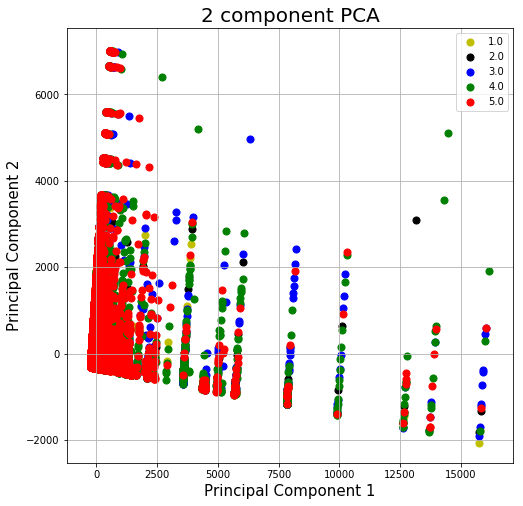

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0,2.0,3.0,4.0,5.0]
colors = ['y','k','b','g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() 

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(finalDf[['principal component 1', 'principal component 2']], finalDf[['class']], test_size=1/3, random_state=1)

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create linear regression object
regr = linear_model.LinearRegression() 

# Fit regression model to the training set
regr.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = regr.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_pred) ))
print('R-squared = %.4f' % r2_score( y_test, y_pred ))

Root mean squared error = 1.3835
R-squared = 0.0009
Root mean squared error = 1.3893
R-squared = 0.0011


In [31]:
from sklearn.metrics import accuracy_score

logistic = linear_model.LogisticRegressionCV(cv= 5 , Cs = [0.01, 0.05, 0.1, 0.5, 1] )
logistic.fit( X_train, y_train.values.ravel() )
class_pred = logistic.predict( X_test )

print('Accuracy = %.4f' % accuracy_score( y_test, class_pred ))

Accuracy = 0.4067


** 3D PCA **

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [33]:
finalDf = pd.concat([principalDf,y],axis=1)
finalDf.head(20)

,principal component 1,principal component 2,principal component 3,class
0,-32.330861,1623.875208,131.095942,5
1,-234.573336,-233.851890,97.798605,5
2,-238.252441,-267.646819,97.192998,5
3,-236.088253,-247.767479,97.549268,5
4,-237.062120,-256.713238,97.388922,4
5,-200.703973,77.260351,103.374724,4
6,-240.308578,-279.580531,101.921422,5
7,-100.544709,-215.246925,-238.756103,4
8,-105.630541,-261.963395,-239.593564,4
9,-85.395451,-76.091364,-236.261969,3


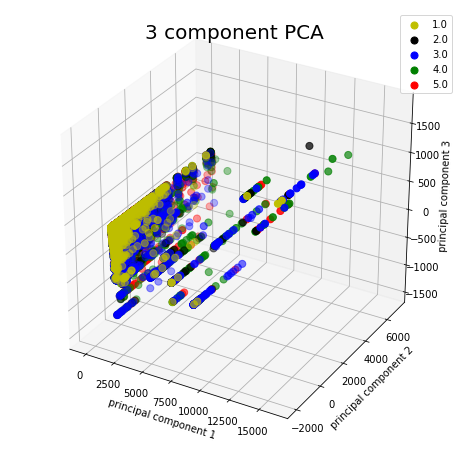

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('3 component PCA', fontsize = 20)
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')

targets = [1.0,2.0,3.0,4.0,5.0]
colors = ['y','k','b','g','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() 

In [35]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(finalDf[['principal component 1', 'principal component 2', 'principal component 3']], finalDf[['class']], test_size=1/3, random_state=1)

In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create linear regression object
regr = linear_model.LinearRegression() 

# Fit regression model to the training set
regr.fit( X_train, y_train.values.ravel() )

y_train_pred = regr.predict(X_train)

# Apply model to the test set
y_pred = regr.predict( X_test )

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_train, y_train_pred) ))
print('R-squared = %.4f' % r2_score( y_train, y_train_pred ))

print("Root mean squared error = %.4f" % np.sqrt( mean_squared_error(y_test, y_pred) ))
print('R-squared = %.4f' % r2_score( y_test, y_pred ))

Root mean squared error = 1.3835
R-squared = 0.0009
Root mean squared error = 1.3893
R-squared = 0.0011


In [37]:
from sklearn.metrics import accuracy_score

logistic = linear_model.LogisticRegressionCV(cv= 5 , Cs = [0.01, 0.05, 0.1, 0.5, 1] )
logistic.fit( X_train, y_train.values.ravel() )
class_pred = logistic.predict( X_test )

print('Accuracy = %.4f' % accuracy_score( y_test, class_pred ))

Accuracy = 0.4234
